# Промежуточное признаковое пространство

In [1]:
import importlib

import statsmodels.tsa.arima_process as arima_process
import matplotlib.pyplot as plt
import numpy as np

import lapprox.models.ssa as ssa
import lapprox.models.ar as ar
import lapprox.models.arma as arma
import lapprox.models.fft as fft
import lapprox.joint.joint_mapping as joint_mapping

importlib.reload(joint_mapping)

%matplotlib inline

/Users/iv/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Создаем отображение

In [2]:
models = {
    "ssa_5": ssa.Ssa(5),
    "ssa_10": ssa.Ssa(10),
    "ar_2": ar.Ar(2),
    "ar_4": ar.Ar(4),
    "arma_2_2": arma.Arma(2, 2),
    "fft": fft.Fft()
}

In [3]:
mapper = joint_mapping.JointMapping(models)

Генерируем данные

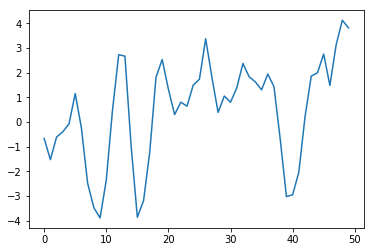

In [4]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
arparams = np.r_[1, -arparams]
maparam = np.r_[1, maparams]
nobs = 50

x = arima_process.arma_generate_sample(arparams, maparam, nobs)
plt.plot(x)

Преобразовываем пространство

In [5]:
mapper.fit(x)

JointMapping(models={'ssa_5': Ssa(lag=None), 'ssa_10': Ssa(lag=None), 'ar_2': Ar(degree=None), 'ar_4': Ar(degree=None), 'arma_2_2': Arma(p=None, q=None), 'fft': Fft()})

In [6]:
mapper.transform()

Model ssa_5: indices 0–5
Model ssa_10: indices 5–15
Model ar_2: indices 15–18
Model ar_4: indices 18–23
Model arma_2_2: indices 23–28
Model fft: indices 28–78


array([[ 22.28305169 +0.j        ,  18.57073167 +0.j        ,
         10.29371994 +0.j        ,   4.02272808 +0.j        ,
          2.80492937 +0.j        ,  22.86732443 +0.j        ,
         21.13406741 +0.j        ,  19.76418454 +0.j        ,
         16.55957760 +0.j        ,   8.08815535 +0.j        ,
          4.49276631 +0.j        ,   3.25134987 +0.j        ,
          3.05478079 +0.j        ,   2.73006609 +0.j        ,
          1.94704613 +0.j        ,   0.21479779 +0.j        ,
          1.22389797 +0.j        ,  -0.63467051 +0.j        ,
          0.17741463 +0.j        ,   1.29937277 +0.j        ,
         -0.65862577 +0.j        ,  -0.12740476 +0.j        ,
          0.22464847 +0.j        ,   0.46634520 +0.j        ,
          1.03185466 +0.j        ,  -0.56654046 +0.j        ,
          0.18861772 +0.j        ,   0.26615775 +0.j        ,
         22.64888767 +0.j        , -11.25339788+20.63578002j,
         26.74900369 +7.37158219j,  14.22009627+17.60996676j,
        

Как себя показывают разные модели?

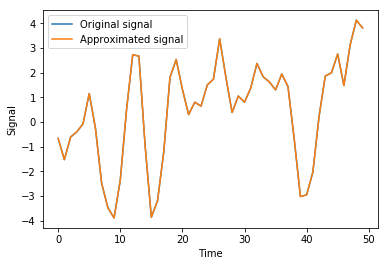

In [7]:
mapper.models["ssa_5"].plot()

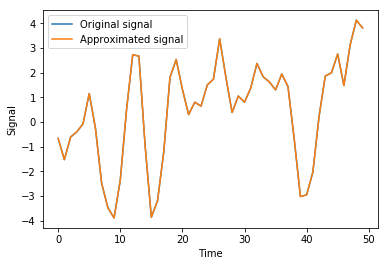

In [8]:
mapper.models["ssa_10"].plot()

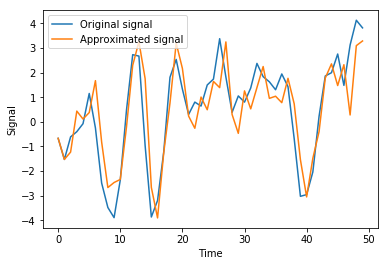

In [9]:
mapper.models["ar_2"].plot()